<a href="https://colab.research.google.com/github/SiddhiKakkar/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
tweets_df = pd.read_csv('/content/twitter.csv')

In [85]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [86]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [87]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [88]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [89]:
tweets_df = tweets_df.drop(['id'],axis = 1)

In [90]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


**EXPLORE** **DATASET**

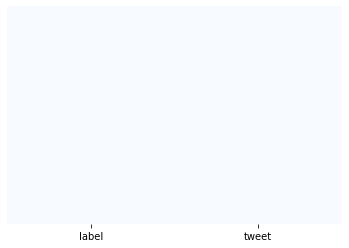

In [91]:
sns.heatmap(tweets_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbd4444550>]],
      dtype=object)

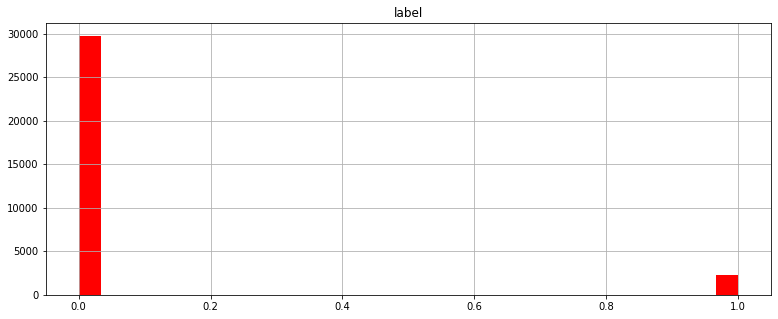

In [92]:
tweets_df.hist(bins=30,figsize=(13,5),color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


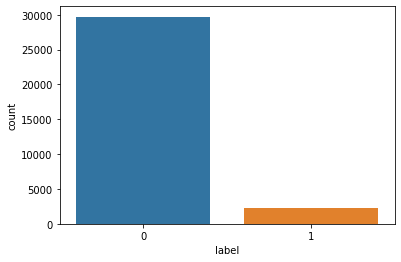

In [93]:
sns.countplot(tweets_df['label'],label='Count')

In [94]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [95]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


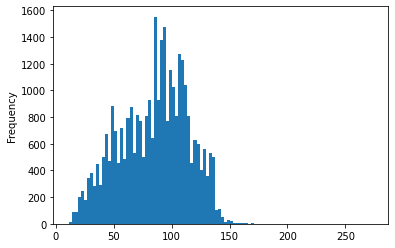

In [96]:
tweets_df['length'].plot(bins=100,kind='hist')

In [97]:
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [98]:
positive = tweets_df[tweets_df['label']==0]

In [99]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [100]:
negative = tweets_df[tweets_df['label']==1]

In [101]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


**PLOT THE WORDCLOUD**

In [102]:
sentences = tweets_df['tweet'].tolist()

In [103]:
# sentences

In [104]:
len(sentences)

31962

In [105]:
sentences_as_one_string = " ".join(sentences)

In [106]:
# sentences_as_one_string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


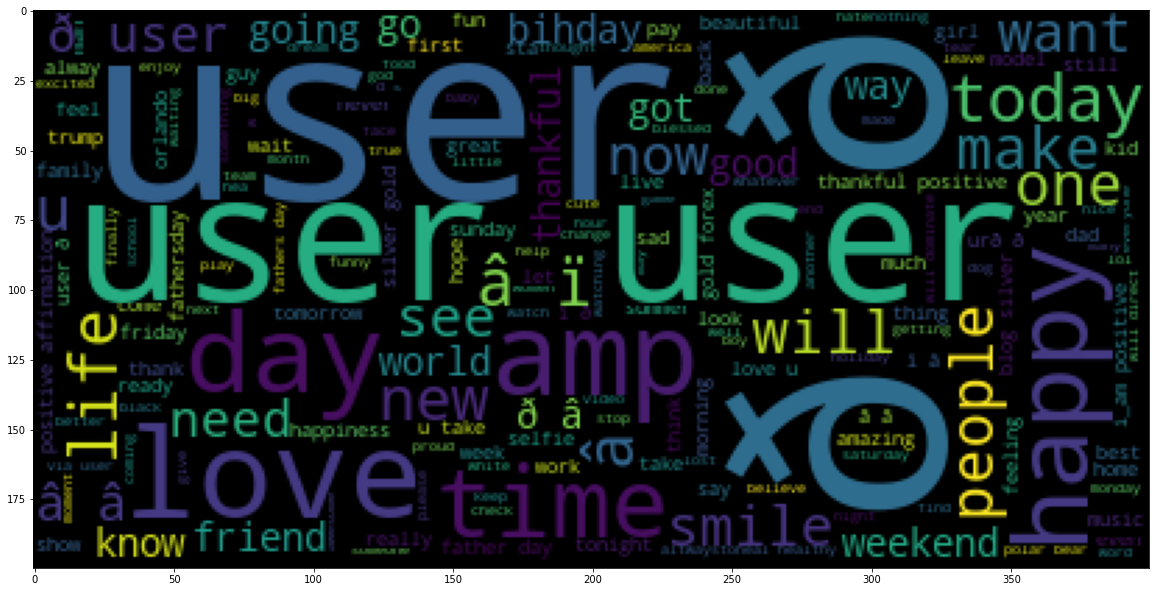

In [107]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

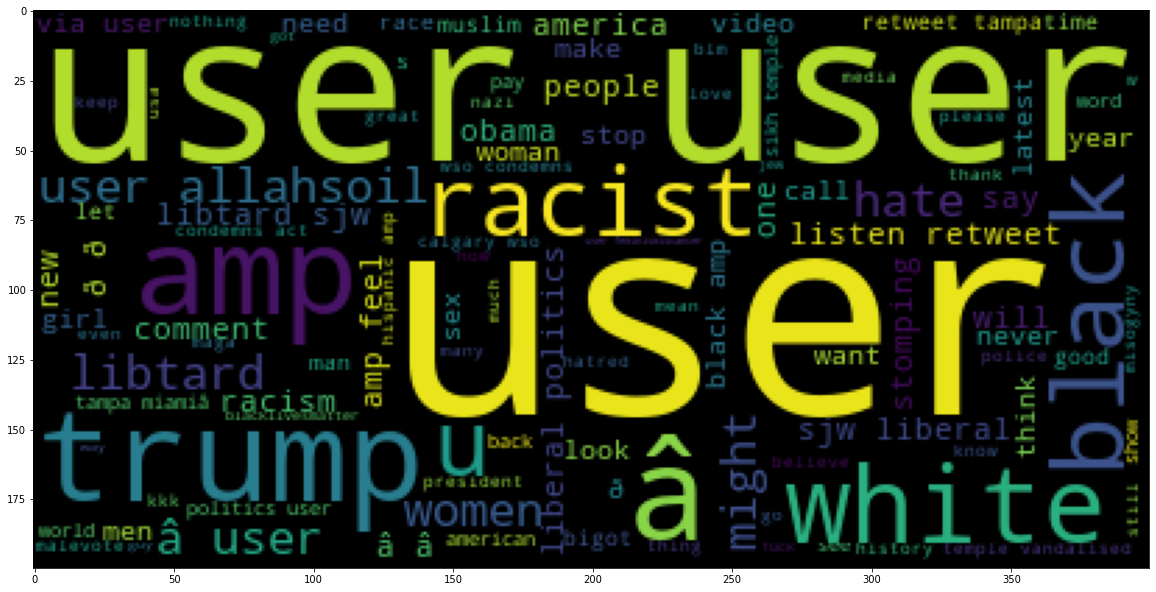

In [108]:
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

**PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT**

In [109]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [110]:
Test = 'Good morning beautiful people :)...'

In [111]:
Test_punc_removed = [ char for char in Test if char not in string.punctuation ]

In [112]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ']

In [113]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people '

In [114]:
# remove punctuations using a different method
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
      Test_punc_removed.append(char)

Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people '

**PERFORM DATA CLEANING - REMOVE STOPWORDS**

In [115]:
import nltk # natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [117]:
Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [118]:
Test_punc_removed_join_clean

['Good', 'morning', 'beautiful', 'people']

**PERFORM COUNT VECTORIZATION (TOKENIZATION)**

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [120]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [121]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


**CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION**

In [122]:
def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean

In [123]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [124]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [125]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [126]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning,dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [127]:
# print(vectorizer.get_feature_names())

In [128]:
tweets_countvectorizer.shape

(31962, 47386)

In [129]:
X = tweets_countvectorizer

In [130]:
y = tweets_df['label']

**TRAIN A NAIVE BAYES CLASSIFIER MODEL**

In [131]:
X.shape                    

(31962, 47386)

In [132]:
y.shape

(31962,)

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [134]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

**ASSESS TRAINED MODEL PERFORMANCE**

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

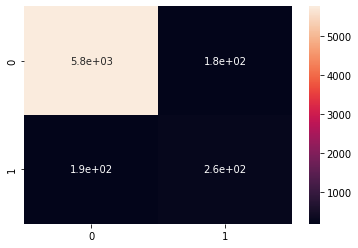

In [136]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [137]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5946
           1       0.60      0.58      0.59       447

    accuracy                           0.94      6393
   macro avg       0.78      0.78      0.78      6393
weighted avg       0.94      0.94      0.94      6393

